In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import torch

In [2]:
# Read in 
df10 = pd.read_csv('../data/df10.csv')

In [3]:
# Inspect
df10.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.611402,0.720283,3.165168,0.372100,-0.360194,6.417779,A2,B3,C16,D1,-16.680112
1,-0.463374,-0.908280,3.046919,0.866590,0.949304,6.142320,A1,B2,C6,D3,-0.347247
2,-0.004264,-2.710478,3.629876,0.587660,-0.413790,7.196720,A2,B1,C10,D3,-13.192616
3,0.310406,-0.511657,3.269785,3.036609,-0.430169,6.363889,A2,B5,C33,D2,0.764504
4,-2.537362,0.594968,1.731083,0.616347,1.753629,3.273066,A1,B1,C6,D3,1.757865


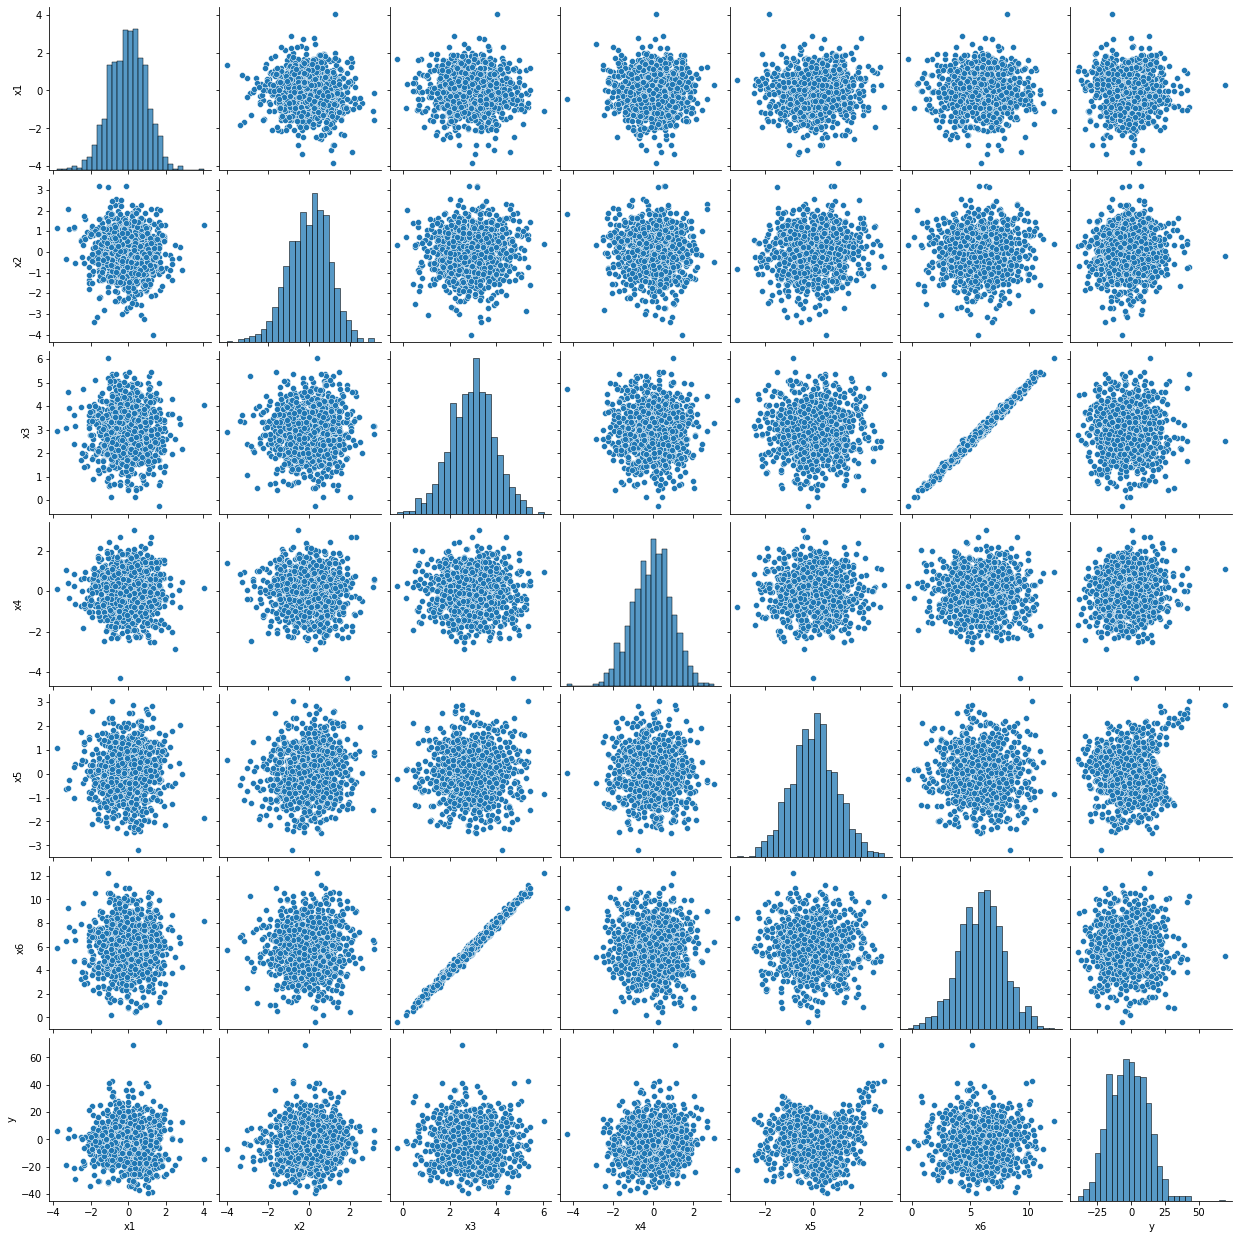

In [4]:
# Numerics
sns.pairplot(df10.head(1000))

### Split into train and test

In [5]:
# Create X/y
predictors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
X, y = df10[predictors].to_numpy(), df10['y'].to_numpy()
#X, y = pd.get_dummies(df10[predictors], prefix=['x7', 'x8', 'x10']), df10['y']

In [6]:
# Split train/test/holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Build on training data: No hidden layers

In [7]:
# Cast to pytorch variable
X_nn = torch.from_numpy(X_train).float()
y_nn = torch.from_numpy(y_train).float()

X_nn_test = torch.from_numpy(X_test).float()
y_nn_test = torch.from_numpy(y_test).float()

In [8]:
# Define model
model = torch.nn.Sequential(
    # Input layer
    torch.nn.Linear(X_nn.shape[1], 1),
    # Output layer
    torch.nn.Flatten(0, 1)
)

# Define loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Define optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1e-2,
    momentum=0.9
)

In [9]:
# Learn!
n_epochs = 10000
batch_size = X_nn.size()[0]

for epoch in range(n_epochs):
    # Generate a permutation of data for mini-batching
    permutation = torch.randperm(X_nn.size()[0])
    
    # Loop over batches
    for i in range(0, X_nn.size()[0], batch_size):
        # Get batch
        batch_indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_nn[batch_indices], y_nn[batch_indices]
        
        # Forward pass
        y_pred = model(batch_X)

        # Print loss on training and test
        loss = loss_fn(y_pred, batch_y)

        # Zero out gradients
        optimizer.zero_grad()

        # Derive backwards loss
        loss.backward()

        # Backpropogate
        optimizer.step()
    
    # Print status for every 100 epochs
    if epoch % 100 == 99:
        loss_train = loss_fn(model(X_nn), y_nn)
        loss_test = loss_fn(model(X_nn_test), y_nn_test)
        def loss_to_str(loss):
            return f'{loss:,.4f}'.rjust(20)
        print(f'Epoch {str(epoch).rjust(5)}, Train: {loss_to_str(loss_train)}, Test: {loss_to_str(loss_test)}')

Epoch    99, Train:             207.0571, Test:             215.0346
Epoch   199, Train:             207.0308, Test:             215.0616
Epoch   299, Train:             207.0202, Test:             215.0527
Epoch   399, Train:             207.0127, Test:             215.0442
Epoch   499, Train:             207.0072, Test:             215.0376
Epoch   599, Train:             207.0032, Test:             215.0328
Epoch   699, Train:             207.0004, Test:             215.0291
Epoch   799, Train:             206.9983, Test:             215.0264
Epoch   899, Train:             206.9968, Test:             215.0243
Epoch   999, Train:             206.9957, Test:             215.0227
Epoch  1099, Train:             206.9949, Test:             215.0215
Epoch  1199, Train:             206.9943, Test:             215.0205
Epoch  1299, Train:             206.9939, Test:             215.0198
Epoch  1399, Train:             206.9936, Test:             215.0193
Epoch  1499, Train:             20

Stabilized.

# One hidden layer

In [10]:
# Define model
model = torch.nn.Sequential(
    # Input layer
    torch.nn.Linear(X_nn.shape[1], 3),
    # Hidden layer (3 nodes)
    torch.nn.Linear(3, 1),
    # Output layer
    torch.nn.Flatten(0, 1)
)

# Define loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Define optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1e-2,
    momentum=0.9
)

In [11]:
# Learn!
n_epochs = 5000
batch_size = X_nn.size()[0]

for epoch in range(n_epochs):
    # Generate a permutation of data for mini-batching
    permutation = torch.randperm(X_nn.size()[0])
    
    # Loop over batches
    for i in range(0, X_nn.size()[0], batch_size):
        # Get batch
        batch_indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_nn[batch_indices], y_nn[batch_indices]
        
        # Forward pass
        y_pred = model(batch_X)

        # Print loss on training and test
        loss = loss_fn(y_pred, batch_y)

        # Zero out gradients
        optimizer.zero_grad()

        # Derive backwards loss
        loss.backward()

        # Backpropogate
        optimizer.step()
    
    # Print status for every 100 epochs
    if epoch % 100 == 99:
        loss_train = loss_fn(model(X_nn), y_nn)
        loss_test = loss_fn(model(X_nn_test), y_nn_test)
        def loss_to_str(loss):
            return f'{loss:,.4f}'.rjust(20)
        print(f'Epoch {str(epoch).rjust(5)}, Train: {loss_to_str(loss_train)}, Test: {loss_to_str(loss_test)}')

Epoch    99, Train:             207.0391, Test:             215.0683
Epoch   199, Train:             207.0202, Test:             215.0573
Epoch   299, Train:             207.0065, Test:             215.0414
Epoch   399, Train:             206.9982, Test:             215.0298
Epoch   499, Train:             206.9945, Test:             215.0229
Epoch   599, Train:             206.9933, Test:             215.0196
Epoch   699, Train:             206.9930, Test:             215.0181
Epoch   799, Train:             206.9929, Test:             215.0174
Epoch   899, Train:             206.9929, Test:             215.0171
Epoch   999, Train:             206.9929, Test:             215.0170
Epoch  1099, Train:             206.9929, Test:             215.0169
Epoch  1199, Train:             206.9929, Test:             215.0169
Epoch  1299, Train:             206.9929, Test:             215.0169
Epoch  1399, Train:             206.9929, Test:             215.0169
Epoch  1499, Train:             20

In [12]:
# Inspect the input layer
vars(model[0])

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([[ 0.0283, -0.0628,  0.9679,  0.0721, -0.0424, -0.2943],
                       [ 0.0159,  0.1900, -0.0608, -0.1133,  0.2462,  0.1027],
                       [-0.5747, -0.2410, -1.3814,  1.5499,  0.7703,  0.8200]],
                      requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([ 0.1582,  0.4553, -0.7136], requires_grad=True))]),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'in_features': 6,
 'out_features': 3}

In [13]:
# Inspect the hidden layer
vars(model[1])

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([[-1.0049,  0.0078,  1.2711]], requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([-1.8609], requires_grad=True))]),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'in_features': 3,
 'out_features': 1}

# Add in the remaining predictors

In [14]:
# Create X/y
predictors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
X, y = pd.get_dummies(df10[predictors], prefix=['x7', 'x8', 'x9', 'x10']), df10['y']

In [15]:
# Split train/test/holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [16]:
# Cast to tensors
X_nn = torch.from_numpy(X_train.to_numpy()).float()
y_nn = torch.from_numpy(y_train.to_numpy()).float()

X_nn_test = torch.from_numpy(X_test.to_numpy()).float()
y_nn_test = torch.from_numpy(y_test.to_numpy()).float()

In [17]:
# Define model
model = torch.nn.Sequential(
    # Input layer
    torch.nn.Linear(X_nn.shape[1], 1),
    # Output layer
    torch.nn.Flatten(0, 1)
)

# Define loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Define optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1e-2,
    momentum=0.9
)

In [18]:
# Learn!
n_epochs = 10000
batch_size = X_nn.size()[0]

for epoch in range(n_epochs):
    # Generate a permutation of data for mini-batching
    permutation = torch.randperm(X_nn.size()[0])
    
    # Loop over batches
    for i in range(0, X_nn.size()[0], batch_size):
        # Get batch
        batch_indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_nn[batch_indices], y_nn[batch_indices]
        
        # Forward pass
        y_pred = model(batch_X)

        # Print loss on training and test
        loss = loss_fn(y_pred, batch_y)

        # Zero out gradients
        optimizer.zero_grad()

        # Derive backwards loss
        loss.backward()

        # Backpropogate
        optimizer.step()
    
    # Print status for every 100 epochs
    if epoch % 100 == 99:
        loss_train = loss_fn(model(X_nn), y_nn)
        loss_test = loss_fn(model(X_nn_test), y_nn_test)
        def loss_to_str(loss):
            return f'{loss:,.4f}'.rjust(20)
        print(f'Epoch {str(epoch).rjust(5)}, Train: {loss_to_str(loss_train)}, Test: {loss_to_str(loss_test)}')

Epoch    99, Train:              72.1595, Test:              80.6206
Epoch   199, Train:              58.6623, Test:              67.7732
Epoch   299, Train:              52.7560, Test:              62.1452
Epoch   399, Train:              50.1589, Test:              59.6724
Epoch   499, Train:              49.0107, Test:              58.5782
Epoch   599, Train:              48.4998, Test:              58.0886
Epoch   699, Train:              48.2705, Test:              57.8652
Epoch   799, Train:              48.1664, Test:              57.7597
Epoch   899, Train:              48.1182, Test:              57.7069
Epoch   999, Train:              48.0954, Test:              57.6781
Epoch  1099, Train:              48.0841, Test:              57.6606
Epoch  1199, Train:              48.0782, Test:              57.6487
Epoch  1299, Train:              48.0750, Test:              57.6398
Epoch  1399, Train:              48.0730, Test:              57.6327
Epoch  1499, Train:              4

### One Hidden Layer

In [19]:
X_nn.shape[1]

66

In [20]:
# Define model
model = torch.nn.Sequential(
    # Input layer
    torch.nn.Linear(X_nn.shape[1], 10),
    # Hidden layer (5 nodes)
    torch.nn.Linear(10, 1),
    # Output layer
    torch.nn.Flatten(0, 1)
)

# Define loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Define optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1e-4,
    momentum=0.9
)

In [21]:
# Learn!
n_epochs = 10000
batch_size = X_nn.size()[0]

for epoch in range(n_epochs):
    # Generate a permutation of data for mini-batching
    permutation = torch.randperm(X_nn.size()[0])
    
    # Loop over batches
    for i in range(0, X_nn.size()[0], batch_size):
        # Get batch
        batch_indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_nn[batch_indices], y_nn[batch_indices]
        
        # Forward pass
        y_pred = model(batch_X)

        # Print loss on training and test
        loss = loss_fn(y_pred, batch_y)

        # Zero out gradients
        optimizer.zero_grad()

        # Derive backwards loss
        loss.backward()

        # Backpropogate
        optimizer.step()
    
    # Print status for every 100 epochs
    if epoch % 100 == 99:
        loss_train = loss_fn(model(X_nn), y_nn)
        loss_test = loss_fn(model(X_nn_test), y_nn_test)
        def loss_to_str(loss):
            return f'{loss:,.4f}'.rjust(20)
        print(f'Epoch {str(epoch).rjust(5)}, Train: {loss_to_str(loss_train)}, Test: {loss_to_str(loss_test)}')

Epoch    99, Train:             198.3406, Test:             204.1014
Epoch   199, Train:             118.5314, Test:             126.0639
Epoch   299, Train:              91.0176, Test:              98.7472
Epoch   399, Train:              85.3696, Test:              93.3713
Epoch   499, Train:              79.8062, Test:              88.0618
Epoch   599, Train:              74.1663, Test:              82.6721
Epoch   699, Train:              68.5471, Test:              77.3063
Epoch   799, Train:              63.2164, Test:              72.2196
Epoch   899, Train:              58.5338, Test:              67.7536
Epoch   999, Train:              54.7977, Test:              64.1911
Epoch  1099, Train:              52.1102, Test:              61.6280
Epoch  1199, Train:              50.3597, Test:              59.9568
Epoch  1299, Train:              49.3138, Test:              58.9554
Epoch  1399, Train:              48.7302, Test:              58.3926
Epoch  1499, Train:              4

# Create a class and helper function for training

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class Df10Net(nn.Module):
    def __init__(self):
        super(Df10Net, self).__init__()
        
        # Input layer
        self.fc1 = nn.Linear(X_nn.shape[1], 1)

    def forward(self, x):
        # Pass in data
        x = self.fc1(x)
        
        #x = torch.flatten(x, 0, 1)
        x = torch.flatten(x)
        
        return x

In [28]:
def train_nn(model, criterion, optimizer, n_epochs, batch_size=None):
    n_rows = X_nn.size()[0]
    
    if not batch_size:
        batch_size = n_rows
    
    for epoch in range(n_epochs):
        # Generate a permutation of data for mini-batching
        permutation = torch.randperm(batch_size)

        # Loop over batches
        for i in range(0, n_rows, batch_size):
            # Get batch
            batch_indices = permutation[i:i+batch_size]
            batch_X, batch_y = X_nn[batch_indices], y_nn[batch_indices]

            # Forward pass
            y_pred = model(batch_X)

            # Print loss on training and test
            loss = criterion(y_pred, batch_y)

            # Zero out gradients
            optimizer.zero_grad()

            # Derive backwards loss
            loss.backward()

            # Backpropogate
            optimizer.step()

        # Print status for every 100 epochs
        if epoch % 100 == 99:
            def loss_to_str(loss):
                return f'{loss:,.4f}'.rjust(10)
            
            loss_train = criterion(model(X_nn), y_nn)
            loss_test = criterion(model(X_nn_test), y_nn_test)
            print(f'Epoch {str(epoch).rjust(5)}, Train: {loss_to_str(loss_train)}, Test: {loss_to_str(loss_test)}')
    
    return model

In [29]:
# Learn!
model1 = Df10Net()
criterion1 = nn.MSELoss(reduction='mean')
optimizer1 = torch.optim.SGD(model1.parameters(), lr=1e-2, momentum=0.9)
model1 = train_nn(
    model1,
    criterion1,
    optimizer1, 
    n_epochs = 10000,
)

Epoch    99, Train:    72.2885, Test:    80.7057
Epoch   199, Train:    58.7167, Test:    67.8015
Epoch   299, Train:    52.7787, Test:    62.1513
Epoch   399, Train:    50.1682, Test:    59.6704
Epoch   499, Train:    49.0144, Test:    58.5739
Epoch   599, Train:    48.5012, Test:    58.0841
Epoch   699, Train:    48.2710, Test:    57.8612
Epoch   799, Train:    48.1665, Test:    57.7564
Epoch   899, Train:    48.1182, Test:    57.7042
Epoch   999, Train:    48.0953, Test:    57.6759
Epoch  1099, Train:    48.0840, Test:    57.6589
Epoch  1199, Train:    48.0782, Test:    57.6473
Epoch  1299, Train:    48.0749, Test:    57.6386
Epoch  1399, Train:    48.0729, Test:    57.6318
Epoch  1499, Train:    48.0717, Test:    57.6260
Epoch  1599, Train:    48.0708, Test:    57.6212
Epoch  1699, Train:    48.0701, Test:    57.6170
Epoch  1799, Train:    48.0696, Test:    57.6133
Epoch  1899, Train:    48.0692, Test:    57.6101
Epoch  1999, Train:    48.0689, Test:    57.6074
Epoch  2099, Train: 

### Add a helper function for early stopping and more robust status printing

- If performance on test data doesn't improve after 5 iterations, stop fitting and pick the last best one.
- Print status based on order of magnitude.  I.e. print iters 0-9 by 1, 10-90 by 10s, 100-900 by 100s, and so on.

In [84]:
from datetime import datetime
from copy import deepcopy

def train_nn(model, criterion, optimizer, n_epochs, batch_size=None):
    def print_status(epoch, train_loss, test_loss):
        def loss_to_str(loss):
            return f'{loss:,.5f}'.rjust(10)
        print(f'{datetime.now().strftime("%H:%M:%S")}, Epoch {str(epoch).rjust(5)}, Train: {loss_to_str(train_loss)}, Test: {loss_to_str(test_loss)}')

    n_rows = X_nn.size()[0]
    
    if not batch_size:
        batch_size = n_rows
    
    best_epoch = None
    best_model = None
    best_test_loss = None
    
    for epoch in range(n_epochs):
        # Generate a permutation of data for mini-batching
        permutation = torch.randperm(batch_size)

        # Loop over batches
        for i in range(0, n_rows, batch_size):
            # Get batch
            batch_indices = permutation[i:i+batch_size]
            batch_X, batch_y = X_nn[batch_indices], y_nn[batch_indices]

            # Forward pass
            y_pred = model(batch_X)

            # Print loss on training and test
            loss = criterion(y_pred, batch_y)

            # Zero out gradients
            optimizer.zero_grad()

            # Derive backwards loss
            loss.backward()

            # Backpropogate
            optimizer.step()
            
        # Check if performance has improved
        train_loss = criterion(model(X_nn), y_nn)
        test_loss = criterion(model(X_nn_test), y_nn_test)
        if not best_test_loss or test_loss < best_test_loss:
            best_epoch = epoch
            best_model = deepcopy(model)
            best_train_loss = train_loss
            best_test_loss = test_loss
            fit_more_counter = 10
        else:
            fit_more_counter -= 1
            
        # If counter reaches 0, print status of the best model and exit training
        if fit_more_counter == 0:
            print(f'\nStopping, test fit has not improved after 10 epochs.  Best epoch:')
            print_status(best_epoch, best_train_loss, best_test_loss)
            return best_model

        # Print status for every 100 epochs
        n_digits_epoch = len(str(epoch + 1)) - 1
        if (epoch + 1) % (10 ** n_digits_epoch) == 0:
            print_status(epoch, train_loss, test_loss)
    
    return best_model

In [86]:
# Test new function.  Based on previous fitting, should stop around epoch 10k
model1 = Df10Net()
criterion1 = nn.MSELoss(reduction='mean')
optimizer1 = torch.optim.SGD(model1.parameters(), lr=1e-2, momentum=0.9)
model1 = train_nn(
    model1,
    criterion1,
    optimizer1, 
    n_epochs = 100000,
)

17:08:52, Epoch     0, Train:  210.16730, Test:  215.32437
17:08:52, Epoch     1, Train:  211.56236, Test:  216.72993
17:08:52, Epoch     2, Train:  203.48668, Test:  208.82994
17:08:52, Epoch     3, Train:  192.01099, Test:  197.72758
17:08:52, Epoch     4, Train:  188.21928, Test:  194.37610
17:08:52, Epoch     5, Train:  176.65485, Test:  182.98407
17:08:52, Epoch     6, Train:  165.62527, Test:  171.93082
17:08:52, Epoch     7, Train:  159.85895, Test:  166.23183
17:08:52, Epoch     8, Train:  148.46840, Test:  155.13431
17:08:52, Epoch     9, Train:  139.73434, Test:  146.88464
17:08:52, Epoch    19, Train:   97.42603, Test:  104.76662
17:08:52, Epoch    29, Train:   93.38117, Test:  100.78732
17:08:52, Epoch    39, Train:   89.88911, Test:   97.60371
17:08:52, Epoch    49, Train:   85.04891, Test:   92.90685
17:08:52, Epoch    59, Train:   81.81722, Test:   89.85898
17:08:52, Epoch    69, Train:   79.17673, Test:   87.36439
17:08:52, Epoch    79, Train:   76.68102, Test:   84.937

# Visualize parameters of this model

In [123]:
# Get weights as a 1D numpy array
model1_fc1_weights = model1.state_dict()['fc1.weight'].numpy().flatten()
model1_fc1_weights

array([ -0.82558393,   0.10359951,  -0.9955734 ,   1.9384155 ,
         0.9069633 ,   0.45717672,   8.629044  , -10.027625  ,
        -5.8073707 ,  -5.9658914 ,   2.6772213 ,   3.9522402 ,
         4.0050917 ,  -9.641325  ,  -4.8787403 ,  -9.251825  ,
        -5.079734  ,   0.36796093,   5.234729  ,   9.571251  ,
       -10.216204  ,  -5.978695  ,  -0.51589805,   5.2981715 ,
         9.79577   ,  -0.3182794 , -11.237688  ,  -5.004089  ,
        -0.442783  ,   4.7763286 ,   9.603096  , -10.117676  ,
        -4.855162  ,  -0.36862776,   5.140289  ,  10.71113   ,
         4.7686586 ,  -9.4160795 ,  -4.239986  ,   0.29292375,
         4.96111   ,  10.473947  , -10.837495  ,  -4.536613  ,
         0.17967659,   4.6481657 ,   9.7404585 ,  10.116636  ,
       -10.364782  ,  -4.567497  ,   0.17475875,   4.835895  ,
        10.566719  , -10.254892  ,  -4.573864  ,  -0.20426589,
         4.9763627 ,   8.37886   , -10.518807  ,  -3.6069577 ,
        -1.0324993 ,   5.023289  ,  10.880997  ,   0.46

<AxesSubplot:>

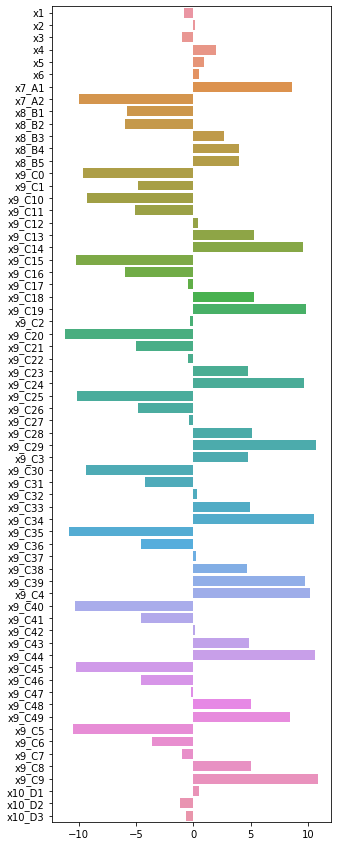

In [134]:
# Plot
plt.figure(figsize=(5, 15))
sns.barplot(x=model1_fc1_weights, y=X_train.columns)

# Add the "best" predictors previously found

In [156]:
# x1: powers 2 and 3
df10['x1_pow2'] = df10['x1'] ** 2
df10['x1_pow3'] = df10['x1'] ** 3
# x2: squared and interacted with x7
df10['x2_pow2_interact_x7_A1'] = (df10['x2'] ** 2) * (df10['x7'] == "A1")
df10['x2_pow2_interact_x7_A2'] = (df10['x2'] ** 2) * (df10['x7'] == "A2")
# x5: powers 2 and 3
df10['x5_pow2'] = df10['x5'] ** 2
df10['x5_pow3'] = df10['x5'] ** 3

# Create X/y
predictors = [
    'x1', 'x1_pow2', 'x1_pow3',
    'x2', 'x2_pow2_interact_x7_A1', 'x2_pow2_interact_x7_A2',
    'x3',
    'x4',
    'x5', 'x5_pow2', 'x5_pow3',
    'x6',
    'x7', 'x8', 'x9', 'x10'
]
X, y = pd.get_dummies(df10[predictors], prefix=['x7', 'x8', 'x9', 'x10']), df10['y']

# Split train/test/holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Cast to tensors
X_nn = torch.from_numpy(X_train.to_numpy()).float()
y_nn = torch.from_numpy(y_train.to_numpy()).float()

X_nn_test = torch.from_numpy(X_test.to_numpy()).float()
y_nn_test = torch.from_numpy(y_test.to_numpy()).float()

In [157]:
# Test new function.  Based on previous fitting, should stop around epoch 10k
model2 = Df10Net()
criterion2 = nn.MSELoss(reduction='mean')
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-2, momentum=0.9)
model2 = train_nn(
    model2,
    criterion2,
    optimizer2, 
    n_epochs = 100000,
)

17:38:25, Epoch     0, Train:  203.23071, Test:  207.42552
17:38:25, Epoch     1, Train:  199.59068, Test:  202.65808
17:38:25, Epoch     2, Train:  186.12173, Test:  188.72154
17:38:25, Epoch     3, Train:  175.32233, Test:  178.10271
17:38:25, Epoch     4, Train:  173.97765, Test:  176.85916
17:38:25, Epoch     5, Train:  155.63655, Test:  157.60620
17:38:25, Epoch     6, Train:  141.09683, Test:  141.37758
17:38:25, Epoch     7, Train:  134.46587, Test:  133.45773
17:38:25, Epoch     8, Train:  123.24439, Test:  122.20072
17:38:25, Epoch     9, Train:  120.93984, Test:  120.61756
17:38:25, Epoch    19, Train:   74.34680, Test:   72.95573
17:38:25, Epoch    29, Train:   57.79957, Test:   57.36938
17:38:25, Epoch    39, Train:   52.10221, Test:   51.65815
17:38:25, Epoch    49, Train:   48.88373, Test:   48.34754
17:38:25, Epoch    59, Train:   45.51780, Test:   44.94986
17:38:25, Epoch    69, Train:   42.68406, Test:   42.10172
17:38:25, Epoch    79, Train:   40.13914, Test:   39.644

<AxesSubplot:>

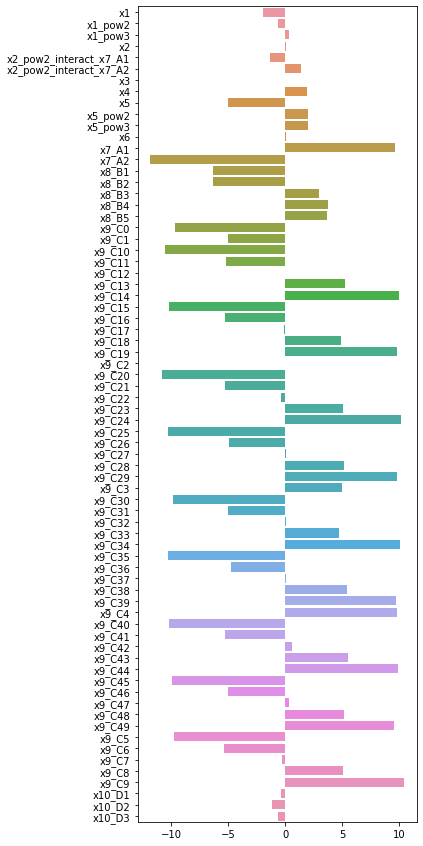

In [158]:
# Visualize weights

# Get weights as a 1D numpy array
model2_fc1_weights = model2.state_dict()['fc1.weight'].numpy().flatten()
model2_fc1_weights

# Plot
plt.figure(figsize=(5, 15))
sns.barplot(x=model2_fc1_weights, y=X_train.columns)

# Even though it doesn't matter with this no-hidden-layers model, compare the default activation function (the identify function?) to others

- Sigmoid
- ReLU
- Tanh

In [171]:
class Df10Net_Activation(nn.Module):
    def __init__(self, activation_function=None):
        super(Df10Net_Activation, self).__init__()
        self.activation_function = activation_function
        
        # Input layer
        self.fc1 = nn.Linear(X_nn.shape[1], 1)

    def forward(self, x):
        # Pass in data
        x = self.fc1(x)
        if self.activation_function:
            x = self.activation_function(x)
        
        #x = torch.flatten(x, 0, 1)
        x = torch.flatten(x)
        
        return x

In [172]:
# Loop through other activation functions
afs = [F.sigmoid, F.tanh, F.relu]
for af in afs:
    print(f'Activation function: {af}')
    model_af = Df10Net_Activation(activation_function = af)
    criterion_af = nn.MSELoss(reduction='mean')
    optimizer_af = torch.optim.SGD(model_af.parameters(), lr=1e-2, momentum=0.9)
    model_af = train_nn(
        model_af,
        criterion_af,
        optimizer_af,
        n_epochs = 100000,
    )

Activation function: <function sigmoid at 0x000000000D02A4C8>
17:58:27, Epoch     0, Train:  223.36586, Test:  228.78444
17:58:27, Epoch     1, Train:  221.63049, Test:  227.03239
17:58:27, Epoch     2, Train:  221.23354, Test:  226.65076
17:58:27, Epoch     3, Train:  221.12859, Test:  226.56068
17:58:27, Epoch     4, Train:  221.05052, Test:  226.50107
17:58:27, Epoch     5, Train:  220.96814, Test:  226.44183
17:58:27, Epoch     6, Train:  220.88832, Test:  226.38486
17:58:27, Epoch     7, Train:  220.81841, Test:  226.33165
17:58:27, Epoch     8, Train:  220.75883, Test:  226.28186
17:58:27, Epoch     9, Train:  220.70862, Test:  226.23627
17:58:27, Epoch    19, Train:  220.51770, Test:  226.00327
17:58:27, Epoch    29, Train:  220.47852, Test:  225.94641
17:58:27, Epoch    39, Train:  220.46007, Test:  225.90524
17:58:27, Epoch    49, Train:  220.44171, Test:  225.86862
17:58:27, Epoch    59, Train:  220.41922, Test:  225.83131
17:58:27, Epoch    69, Train:  220.39029, Test:  225.

C:\Users\Kenneth\Miniconda3\envs\pytorch_cpu_1\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



17:59:08, Epoch    89, Train:  213.95680, Test:  219.32401
17:59:08, Epoch    99, Train:  213.93694, Test:  219.24063
17:59:08, Epoch   199, Train:  207.03636, Test:  212.76152

Stopping, test fit has not improved after 10 epochs.  Best epoch:
17:59:08, Epoch   224, Train:  202.53000, Test:  208.31459
Activation function: <function relu at 0x000000000CFE6948>
17:59:08, Epoch     0, Train:  221.76161, Test:  227.31671
17:59:08, Epoch     1, Train:  221.44034, Test:  226.64415
17:59:08, Epoch     2, Train:  218.35234, Test:  222.27264
17:59:08, Epoch     3, Train:  211.37697, Test:  213.23694
17:59:08, Epoch     4, Train:  206.77409, Test:  206.34120
17:59:08, Epoch     5, Train:  206.16058, Test:  204.49237
17:59:08, Epoch     6, Train:  206.08131, Test:  204.35794
17:59:08, Epoch     7, Train:  205.47171, Test:  204.21016
17:59:08, Epoch     8, Train:  204.23990, Test:  203.42462
17:59:08, Epoch     9, Train:  203.07761, Test:  202.43092
17:59:08, Epoch    19, Train:  203.24144, Test:

In [ ]:
class Df10Net(nn.Module):
    def __init__(self):
        super(Df10Net, self).__init__()
        
        # Input layer
        self.fc1 = nn.Linear(X_nn.shape[1], 1)

    def forward(self, x):
        # Pass in data
        x = self.fc1(x)
        
        #x = torch.flatten(x, 0, 1)
        x = torch.flatten(x)
        
        return x